# Housing Price Prediction

Data Set - I am going to work on Housing Prices Dataset which can be used to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. This data set contains 13 coloums which are consist of different types of data types - Boolean, Integer, String.

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats

In [ ]:
#reading the dataset
ds = pd.read_csv("https://raw.githubusercontent.com/ritviksaxena05/DataScience_Assignment1/main/HousingPricePrediction.csv")

In [ ]:
#Viewing data in the file
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Q1 - What are the data types? (Only numeric and categorical)

In [ ]:
#Identifying the Datatypes of the columns
ds.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In the above datatypes, The numerical columns are indicated as int64 and the categorical columns are indicated object.

To find categorical we will execute the following code:

In [ ]:
# List of categorical columns
categorical_columns = [
    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
    'furnishingstatus'
]

# Convert columns to categorical
ds[categorical_columns] = ds[categorical_columns].astype('category')

# Check data types after conversion
print(ds.dtypes)


price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


# Q-2 Are there missing values?

In [ ]:
#checking if any of the data is missing
ds.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking if any of the data is missing
ds.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Hence, No missing data

# Q3 - Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

To identify which independent variables are useful in predicting the target variable, we can use the following three methods:

1. Correlation Analysis:
We can calculate the correlation coefficient between each independent variable and the dependent variable. The correlation coefficient measures the strength and direction of a linear relationship between two variables. A high absolute value of the correlation indicates a strong relationship.
2. Feature Importance from Tree-based Models:
Tree-based models like Decision Trees, Random Forests, and Gradient Boosting can be used to calculate feature importance, which quantifies the usefulness of each feature in predicting the target variable.
3. Recursive Feature Elimination (RFE):
RFE is a feature selection method that fits a model and removes the weakest feature(s) until the specified number of features is reached. It is helpful in identifying which features contribute the most to predicting the target variable.

In [ ]:
#1 - Correlation Analysis

from numpy.lib.shape_base import dsplit
# Perform one-hot encoding for categorical columns
ds_encoded = pd.get_dummies(ds, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = ds_encoded.corr()

# Extract the correlation between independent variables and the target variable 'price'
correlation_with_price = correlation_matrix['price'].drop('price')

# Display the correlation of independent variables with price
correlation_with_price.sort_values(ascending=False)


area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

above are the correlation coefficients between the independent variables and the target variable **price**.

Higher absolute values of the correlation coefficient indicate a stronger linear relationship with the price. Based on these results, variables like **area**, **bathrooms**, **airconditioning**, **stories**, and **prefarea** seem to have a stronger linear relationship with **price** compared to the others.

In [ ]:
#2 - Feature Importance from Random Forest Model

from sklearn.ensemble import RandomForestRegressor

# Separate the target variable and independent variables
X = ds_encoded.drop('price', axis=1)
y = ds_encoded['price']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the entire dataset
rf_model.fit(X, y)

# Extract feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importance


area                               0.466788
bathrooms                          0.154835
parking                            0.061691
stories                            0.055426
airconditioning_yes                0.054924
bedrooms                           0.042237
furnishingstatus_unfurnished       0.039007
prefarea_yes                       0.034931
basement_yes                       0.030676
guestroom_yes                      0.018325
hotwaterheating_yes                0.016329
furnishingstatus_semi-furnished    0.015126
mainroad_yes                       0.009704
dtype: float64

The results are somewhat consistent with the correlation analysis, indicating **area**, **bathrooms**, **stories**, **airconditioning**, and **prefarea** as some of the most important features.

In [ ]:
#3 - Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr_model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=lr_model, n_features_to_select=1)

# Fit RFE to the dataset
rfe.fit(X, y)

# Get the ranking of features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

feature_ranking


bathrooms                           1
airconditioning_yes                 2
mainroad_yes                        3
hotwaterheating_yes                 4
prefarea_yes                        5
furnishingstatus_unfurnished        6
guestroom_yes                       7
parking                             8
stories                             9
basement_yes                       10
bedrooms                           11
furnishingstatus_semi-furnished    12
area                               13
dtype: int64

**bathrooms** is ranked as the most important feature by RFE, followed by **mainroad**, **airconditioning**, and **prefarea**. The **area**, which was found to be significant in correlation analysis and Random Forest feature importance, is ranked last in RFE. This discrepancy could arise due to the different nature of the models and methods used for feature selection.

# Q4 - What are the likely distributions of the numeric variables?

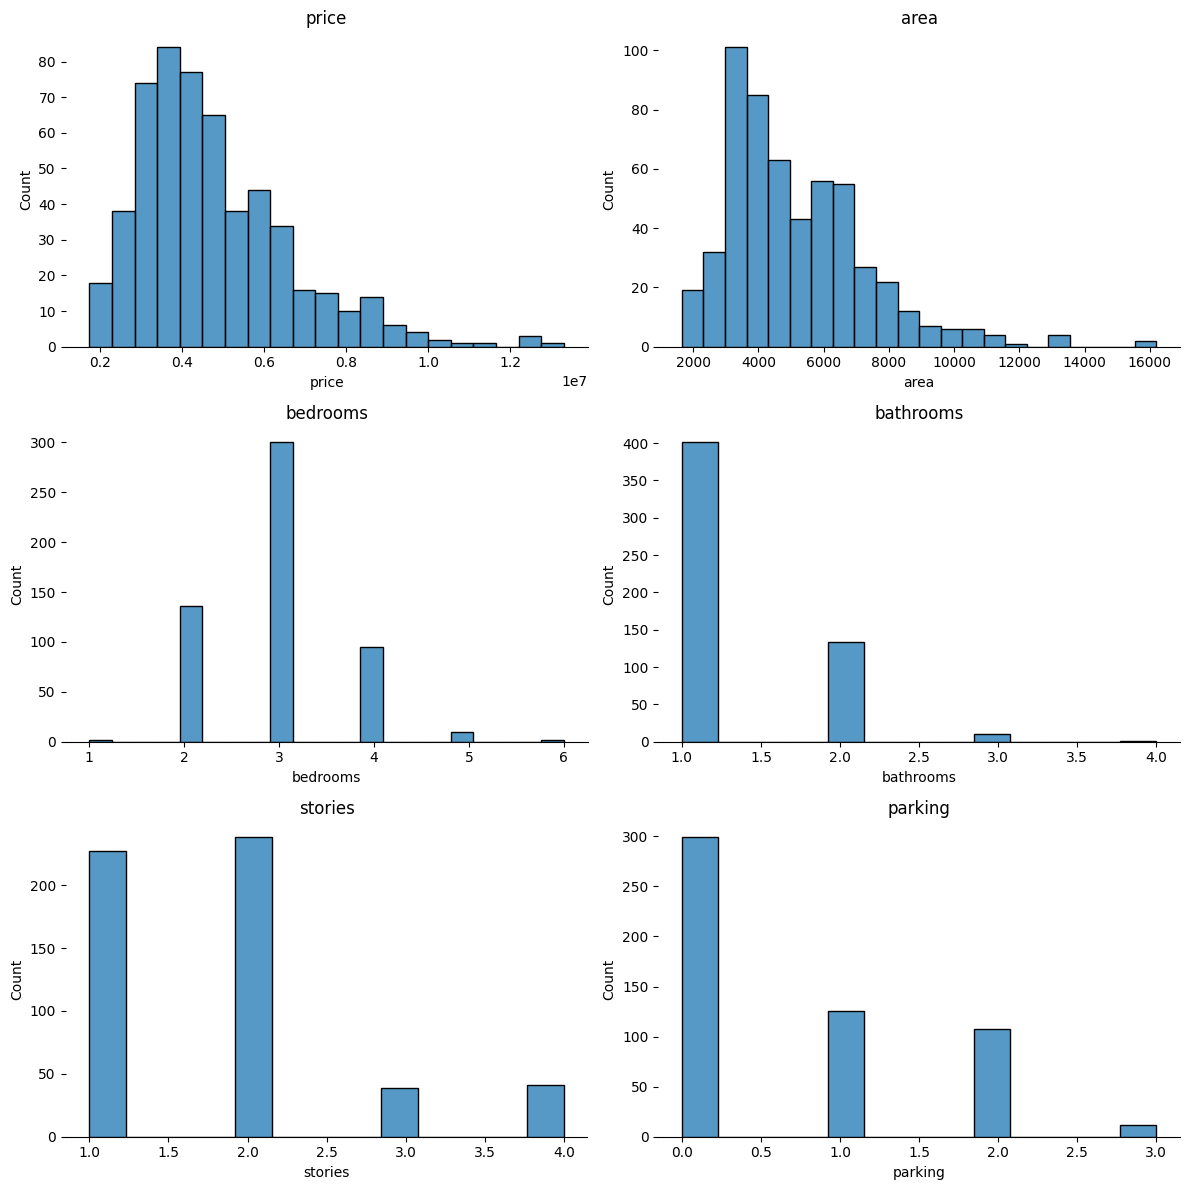

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
sns.despine(left=True)

# List of numeric columns
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Loop over numeric columns and plot histogram on respective axis
for i, col in enumerate(num_vars):
    sns.histplot(ds[col], kde=False, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)

plt.tight_layout()
plt.show()

In the above Fig
**Price**: The histogram for price shows a right-skewed distribution, meaning most houses are concentrated in the lower price range, with fewer houses in the higher price range.

**Area**: The area also has a right-skewed distribution, indicating that most houses have a smaller area, with fewer houses having a larger area.

**Bedrooms**: The bedrooms histogram suggests a multimodal distribution with peaks at 2, 3, and 4 bedrooms. This indicates that most houses have between 2 to 4 bedrooms.

**Bathrooms**: The majority of houses have 1 bathroom, and the distribution is right-skewed with a decreasing number of houses having more bathrooms.

**Stories**: The stories histogram shows a multimodal distribution with peaks at 1 and 2 stories. There are fewer houses with 3 or 4 stories.

**Parking**: The parking histogram illustrates that most houses have no parking or just 1 parking space, with a decreasing number of houses having more parking spaces, showing a right-skewed distribution.


# Q-5 Do the training and test sets have the same data?


To see if the training and test sets include the same data, we must first divide the dataset into training and test sets. To perform this split, we can utilize scikit-learn's train_test_split method. In most cases, 70-80% of the data is used for training, with the remaining 20-30% used for testing.

Let us now divide the provided dataset into training and test sets and see if they include the same data.

In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 42

# Split the dataset into training and test sets (80:20 ratio)
train_data, test_data = train_test_split(ds_encoded, test_size=0.20, random_state=random_seed)

# Display the shapes of the training and test sets
train_data.shape, test_data.shape


((436, 14), (109, 14))

In [ ]:
#checking whether there is any same data
common_rows = train_data.merge(test_data, how='inner')
number_of_common_rows = common_rows.shape[0]

number_of_common_rows

0

There are no common rows between the training and test sets; they are different, with 0 rows in common. Because the train_test_split method is designed to partition the dataset into non-overlapping sections, this is the expected result.


# Q-6 In the predictor variables independent of all the other predictor variables?


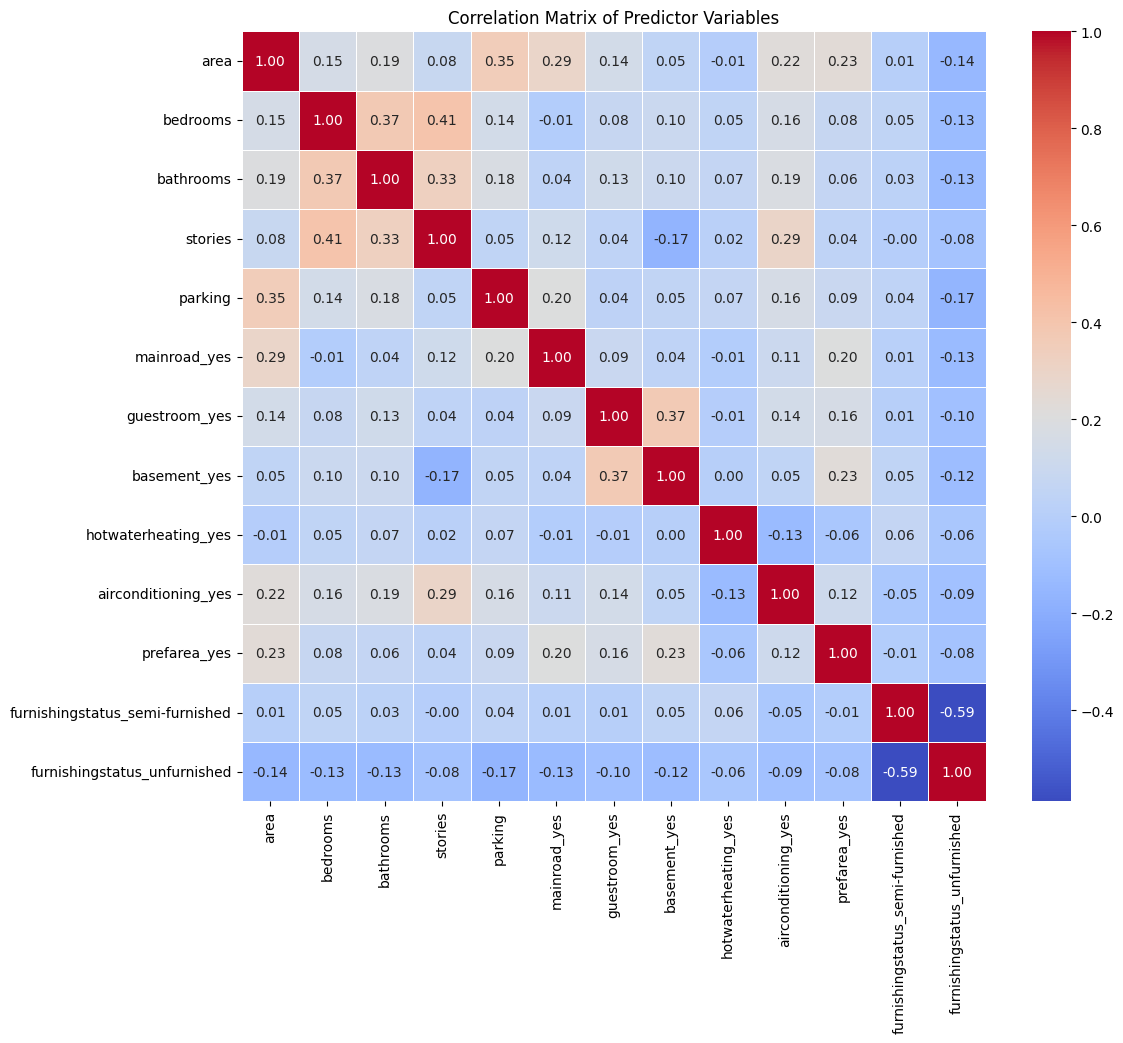

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Droping the target variable 'price' to get only predictor variables
predictor_variables = ds_encoded.drop('price', axis=1)

# Calculating the correlation matrix for predictor variables
correlation_matrix_predictors = predictor_variables.corr()

plt.figure(figsize=(12, 10))

# heatmap
sns.heatmap(correlation_matrix_predictors, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Set the title of the plot
plt.title('Correlation Matrix of Predictor Variables')

# Show the plot
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["variable"] = predictor_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]

# Display VIF for each variable
print(vif_data)


                           variable        VIF
0                              area   8.276447
1                          bedrooms  16.652387
2                         bathrooms   9.417643
3                           stories   7.880730
4                           parking   1.986400
5                      mainroad_yes   6.884806
6                     guestroom_yes   1.473234
7                      basement_yes   2.019858
8               hotwaterheating_yes   1.091568
9               airconditioning_yes   1.767753
10                     prefarea_yes   1.494211
11  furnishingstatus_semi-furnished   2.386831
12     furnishingstatus_unfurnished   2.008632


High VIF Values:



1.   bedrooms (VIF = 16.65)
2.   bathrooms (VIF = 9.42)
3.   area (VIF = 8.28)
4.   stories (VIF = 7.88)
5.   mainroad_yes (VIF = 6.88)
6.   List item

Moderate to Low VIF Values:
All other variables have VIF values below 5, indicating low to moderate correlation.

So in conclusion no, not all predictor variables are independent of all the other predictor variables in this dataset. There is evidence of multicollinearity, indicating dependency between some predictor variables.

# Q-7 Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

### 1. **Correlation Analysis:**
   - **area, bathrooms, airconditioning, stories**, and **prefarea** had higher absolute correlation values with the target variable **price**, suggesting they have a stronger linear relationship with the target.

### 2. **Feature Importance from Random Forest Model:**
   - The Random Forest model highlighted **area, bathrooms, airconditioning and prefarea** as some of the most important features, which is somewhat consistent with the correlation analysis.

### 3. **Recursive Feature Elimination (RFE):**
   - RFE ranked **bathrooms, mainroad, airconditioning**, and **prefarea** as top-ranked features, showing a different ranking compared to correlation and Random Forest feature importance, with **area** being ranked last.

### Conclusion:
- Based on the consensus across different methods, **bathrooms**, **airconditioning_yes**, and **prefarea_yes** can be considered as important predictor variables.
- Variables like **area, stories, and mainroad_yes** also show importance in some methods, indicating that the importance of predictor variables can be context and model-dependent.


# Q-8 Do the ranges of the predictor variables make sense?



In [30]:
# Calculate the minimum and maximum of each predictor variable
ranges = predictor_variables.agg([min, max])

# Display the ranges
print(ranges)


      area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
min   1650         1          1        1        0             0   
max  16200         6          4        4        3             1   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
min              0             0                    0                    0   
max              1             1                    1                    1   

     prefarea_yes  furnishingstatus_semi-furnished  \
min             0                                0   
max             1                                1   

     furnishingstatus_unfurnished  
min                             0  
max                             1  


As the ranges of the predictor varialbe are in sensible range so yes it make sense.

# Q-9 What are the distributions of the predictor variables?   



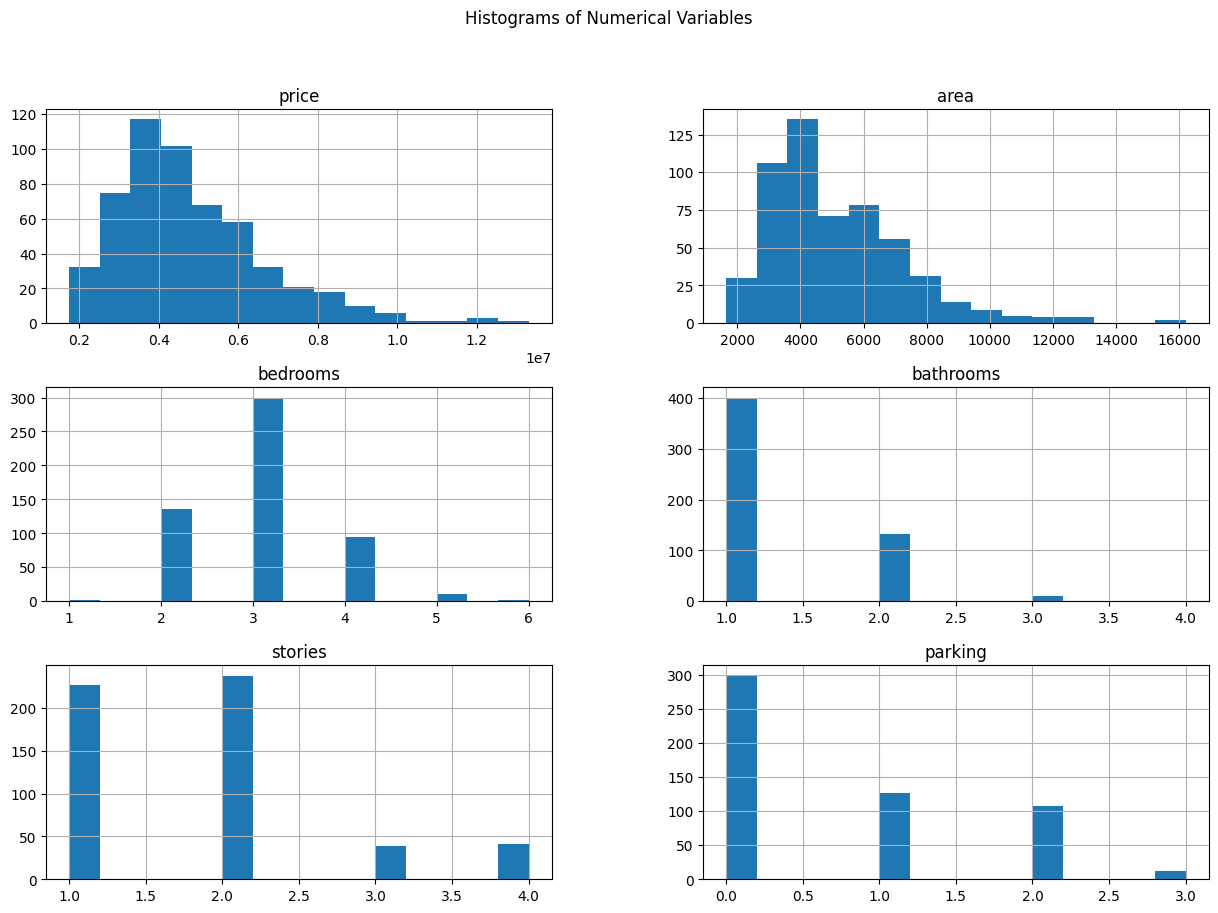

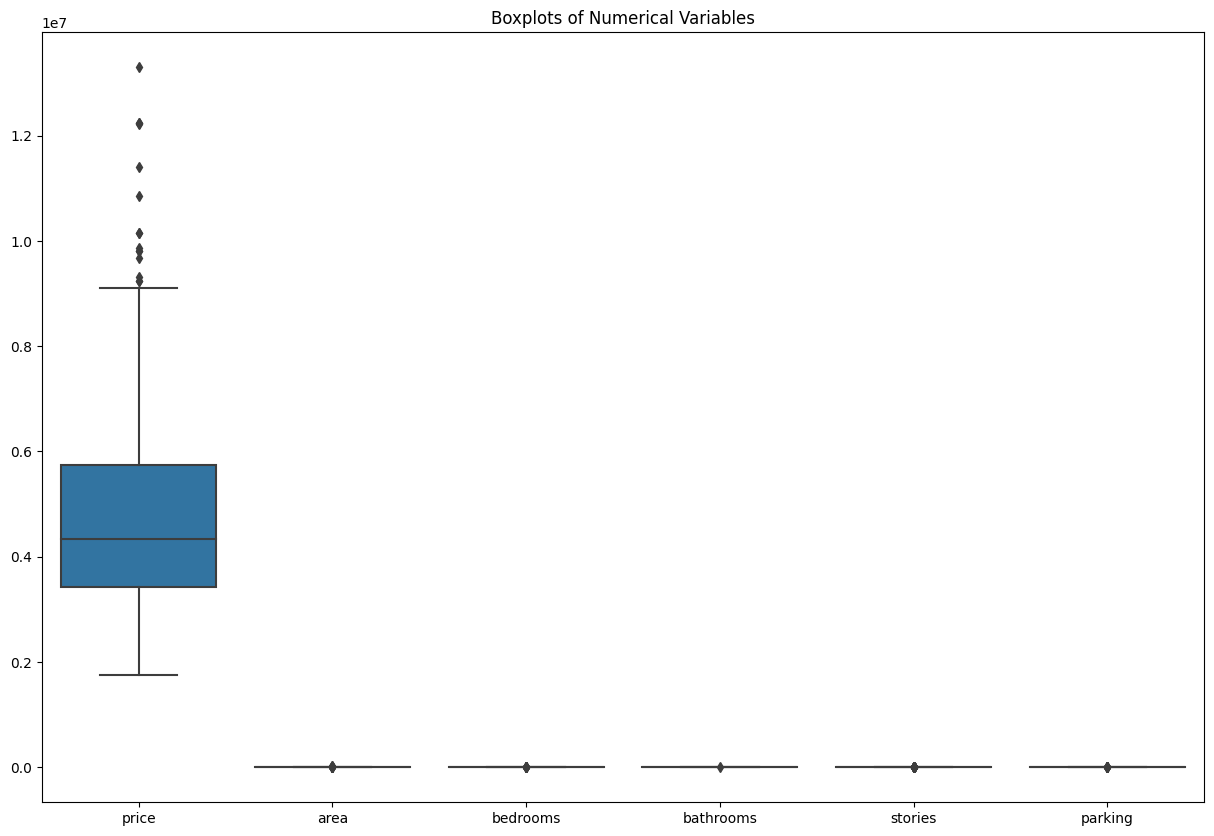

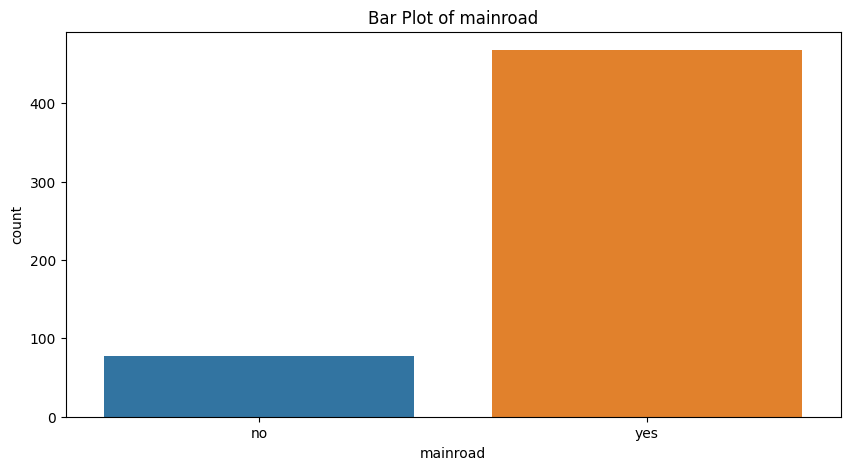

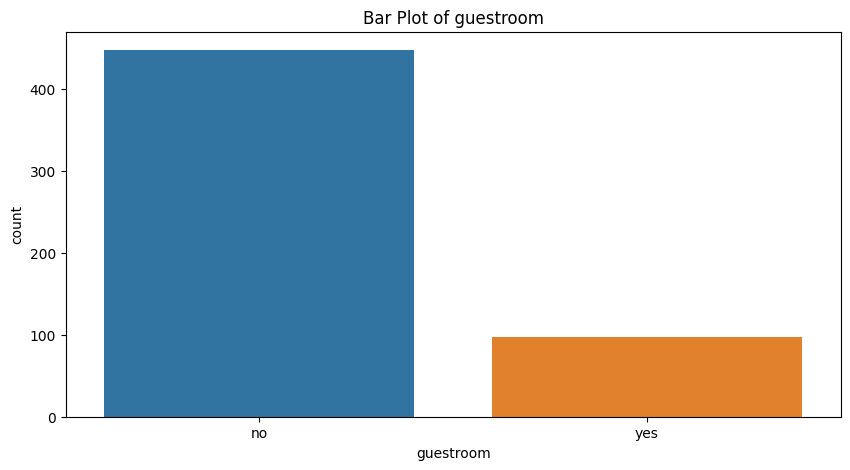

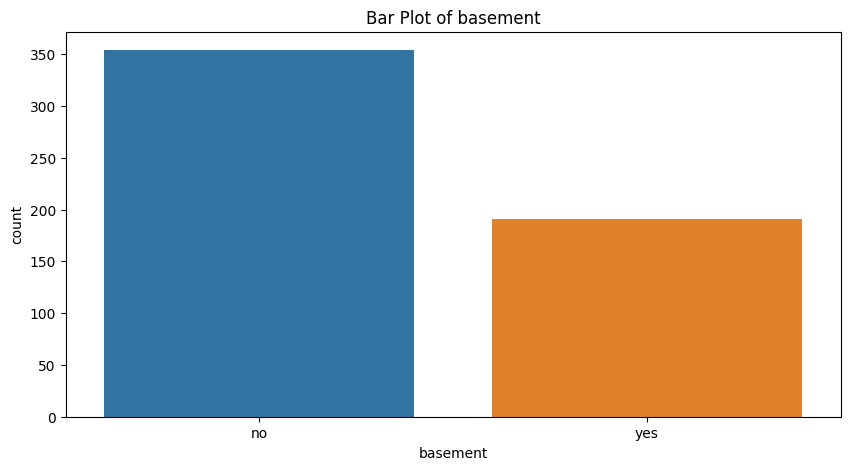

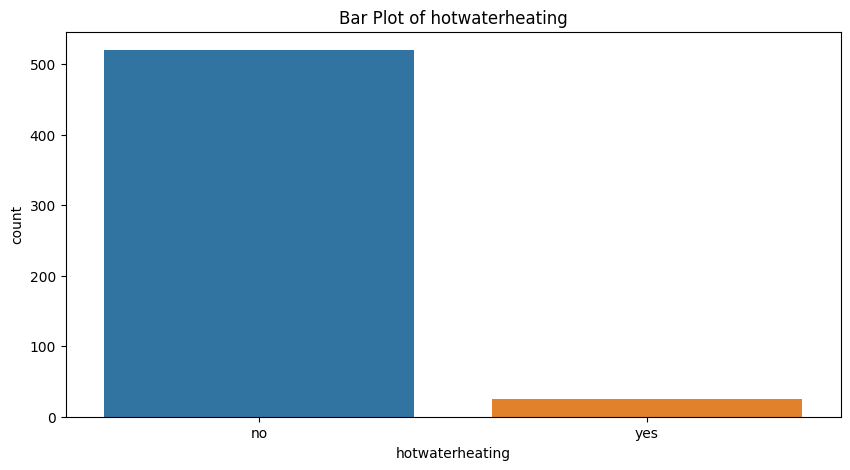

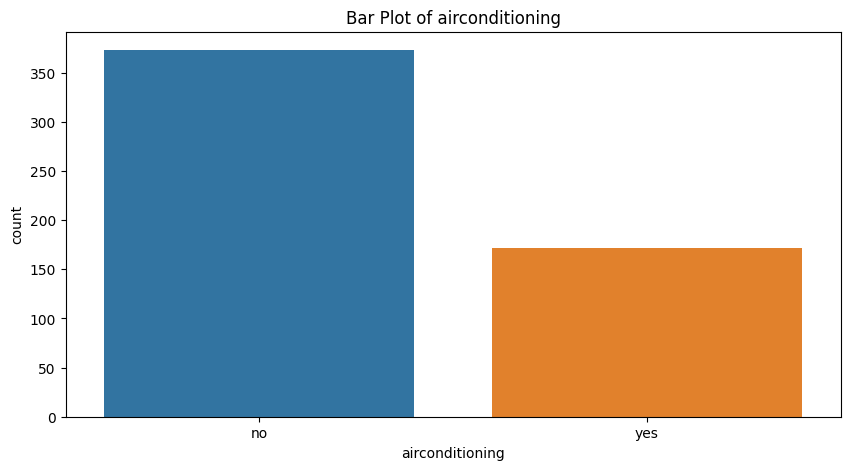

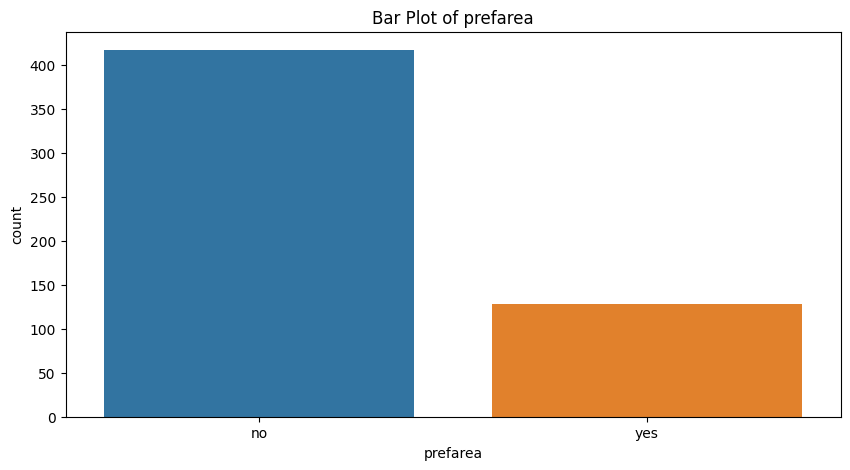

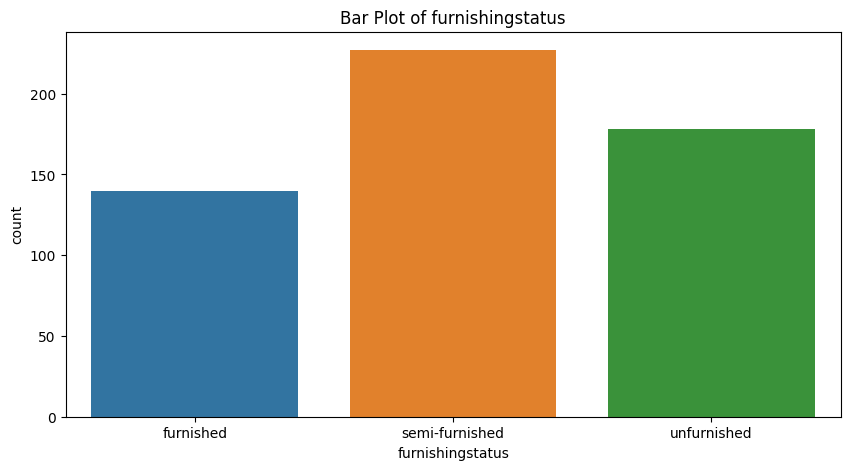

In [35]:
# For Numerical Variables:
numerical_vars = ds.select_dtypes(include=['int64', 'float64'])

# Plot histograms
numerical_vars.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Plot boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_vars)
plt.title('Boxplots of Numerical Variables')
plt.show()

# For Categorical Variables:
categorical_vars = ds.select_dtypes(include=['object', 'category'])

# Plot bar plots
for column in categorical_vars.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=categorical_vars, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.show()


# Q-10 Remove outliers and keep outliers (does if have an effect of the final predictive model)?



In [37]:
# spliting the dataset into training and validation sets

# Re-importing necessary libraries and re-running necessary steps due to loss of state.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Re-defining categorical and numerical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Re-defining the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)])

# Re-defining the model and pipeline
model = LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Re-defining target and predictors for original dataset
y = ds['price']
X = ds.drop('price', axis=1)

# Re-removing outliers and re-defining target and predictors for cleaned dataset
def remove_outliers(df, column_names):
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

ds_no_outliers = remove_outliers(ds, numerical_columns)
y_no_outliers = ds_no_outliers['price']
X_no_outliers = ds_no_outliers.drop('price', axis=1)

# Re-splitting the datasets into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train_no_outliers, X_valid_no_outliers, y_train_no_outliers, y_valid_no_outliers = train_test_split(X_no_outliers, y_no_outliers, train_size=0.8, test_size=0.2, random_state=0)

# Checking the shapes of the training and validation sets
(X_train.shape, X_valid.shape), (X_train_no_outliers.shape, X_valid_no_outliers.shape)


(((436, 12), (109, 12)), ((377, 12), (95, 12)))

In [38]:
#training the Linear Regression model on both the original and the cleaned datasets and then evaluate their performances
#using R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_valid, y_valid, pipeline):
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predictions
    preds = pipeline.predict(X_valid)

    # Evaluate the model
    mae = mean_absolute_error(y_valid, preds)
    mse = mean_squared_error(y_valid, preds)
    r2 = r2_score(y_valid, preds)

    return mae, mse, r2

# Train and evaluate the model on the original dataset
mae_original, mse_original, r2_original = train_and_evaluate(X_train, y_train, X_valid, y_valid, pipeline)

# Train and evaluate the model on the dataset without outliers
mae_no_outliers, mse_no_outliers, r2_no_outliers = train_and_evaluate(X_train_no_outliers, y_train_no_outliers, X_valid_no_outliers, y_valid_no_outliers, pipeline)

mae_original, mse_original, r2_original, mae_no_outliers, mse_no_outliers, r2_no_outliers


(716231.1189748809,
 976484771024.6133,
 0.6611214250980095,
 829481.6106560216,
 1222967269641.2488,
 0.6041256447802577)

**Original Dataset** (with outliers):

*   Mean Absolute Error (MAE): 716,231.12
*   Mean Squared Error (MSE): 976,484,771,024.61
*   R-squared (R²): 0.6611

**Cleaned Dataset** (without outliers):
*   Mean Absolute Error (MAE): 829,481.61
*   Mean Squared Error (MSE): 122,296,726,9641.24
*   R-squared (R²): 0.6041

Conclusion - The R-squared value is higher for the model trained with the original dataset (including outliers) compared to the model trained with the cleaned dataset (without outliers).
This suggests that the model with outliers explains more of the variance in the target variable.
Conversely, the MAE and MSE are also higher for the model trained with the original dataset, indicating larger errors.

# Q-11 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [53]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

housing_data = ds

# Define percentages and numerical columns
percentages = [0.01, 0.05, 0.10]
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Function to remove data and store original values
def remove_data_and_store_original(df, percentage):
    np.random.seed(0)
    df_copy = df.copy(deep=True)
    original_values = []
    num_values = int(df.size * percentage)
    indices_to_remove = [(i, j) for i in range(df.shape[0]) for j in range(df.shape[1])]
    np.random.shuffle(indices_to_remove)
    indices_to_remove = indices_to_remove[:num_values]
    for i, j in indices_to_remove:
        original_values.append((i, j, df_copy.iat[i, j]))
        df_copy.iat[i, j] = np.nan
    return df_copy, original_values

# Impute and Evaluate
for perc in percentages:
    df_with_missing, original_values = remove_data_and_store_original(housing_data[numerical_columns], perc)

    # Mean Imputation
    mean_imputer = SimpleImputer(strategy='mean')
    df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df_with_missing), columns=numerical_columns)

    # Median Imputation
    median_imputer = SimpleImputer(strategy='median')
    df_median_imputed = pd.DataFrame(median_imputer.fit_transform(df_with_missing), columns=numerical_columns)

    # k-NN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_with_missing), columns=numerical_columns)

    # Evaluate each imputation method
    for imputed_df, method in zip([df_mean_imputed, df_median_imputed, df_knn_imputed], ['Mean', 'Median', 'k-NN']):
        residuals = [original_value[2] - imputed_df.iat[original_value[0], original_value[1]] for original_value in original_values]
        mse = mean_squared_error([original_value[2] for original_value in original_values], [imputed_df.iat[original_value[0], original_value[1]] for original_value in original_values])
        bias = np.mean(residuals)
        variance = np.var(residuals)
        print(f"Percentage: {perc * 100}%, Method: {method}, MSE: {mse}, Bias: {bias}, Variance: {variance}")


Percentage: 1.0%, Method: Mean, MSE: 996863.5009556317, Bias: -50.70089630899665, Variance: 994292.9200690963
Percentage: 1.0%, Method: Median, MSE: 1008860.7777777778, Bias: 72.25925925925925, Variance: 1003639.377229081
Percentage: 1.0%, Method: k-NN, MSE: 811865.785185185, Bias: -39.69629629629627, Variance: 810289.9892455416
Percentage: 5.0%, Method: Mean, MSE: 680180.3851792691, Bias: -0.5566573997195372, Variance: 680180.0753118086
Percentage: 5.0%, Method: Median, MSE: 753760.4558823529, Bias: 116.44117647058823, Variance: 740201.9083044981
Percentage: 5.0%, Method: k-NN, MSE: 749582.7179411764, Bias: 69.91323529411768, Variance: 744694.8574718857
Percentage: 10.0%, Method: Mean, MSE: 941541.6356629683, Bias: 50.107400204927785, Variance: 939030.8841076714
Percentage: 10.0%, Method: Median, MSE: 1070063.606617647, Bias: 158.87867647058823, Variance: 1044821.172780601
Percentage: 10.0%, Method: k-NN, MSE: 892345.0091176471, Bias: 54.06911764705883, Variance: 889421.5396345155


Summary:

*   **k-NN Imputation** generally has the lowest MSE among the three methods, making it the most accurate method for imputing missing values in this scenario.
*   **Mean Imputation** is almost unbiased when 5% of the data is missing and generally has lower absolute bias, making it reliable in terms of bias.
*  **Median Imputation** has the highest MSE and absolute bias in most cases, making it the least accurate and reliable method among the three in this scenario.



# References

* https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
* Sckit learn offcial documentation
* Eli5 official documentation


MIT License Copyright (c) 2023 Ritvik Saxena

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE